In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [174]:
def read_data():
    data = pd.read_csv("C:/Users/Rushikesh/Desktop/Machine Learning/Projects and Assignments/Project - 3&4_Multiple_Reg/ToyotaCorolla.csv", encoding='latin1')
    return data

In [175]:
data = read_data()
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## Copying the data and doing transformations on the same

In [176]:
df = data.copy()
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# Feature Engineering

## Data Preparation

In [177]:
print(df.columns)
df = df.rename({'Age_08_04' : 'Age'}, axis = 1)

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')


In [178]:
df = df.drop('Id', axis = 1)       ## Dropping the Id lable from copied dataset

## Exploratory Data Analysis (EDA)

In [179]:
df.info()     ### No null values, also Data Typesare correctly assigned to each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age               1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [180]:
df.describe()

,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
df.shape

(1436, 37)

In [182]:
print(df.duplicated())
print(df[df.duplicated()].sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool
Model               0
Price               0
Age                 0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype:

### EDA - Correlation Analysis

In [183]:
df[['Price', 'Age', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar']].corr()

,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.132092,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292


In [184]:
# Independent variables to chose based on correlation analysis. 

## In business terms, I chose only those factors which will help customers 

# But in statistical terms I will chose those variables which are likely to affect dependent variable price in predictions. I selected it based on
# if indepdent variable's effect on dependent variable more than or nearly 50%

## In this case only Age, Mfg_Year, KM and Weight are continuous variables so I will rely on those for predictions.

#df[['Age', 'Mfg_Year', 'KM', 'Weight']]


## Statistical Analysis : Regression plot to check original residual error for each indepdent variable with dependent variable 'Price'

<Axes: xlabel='Price', ylabel='Age'>

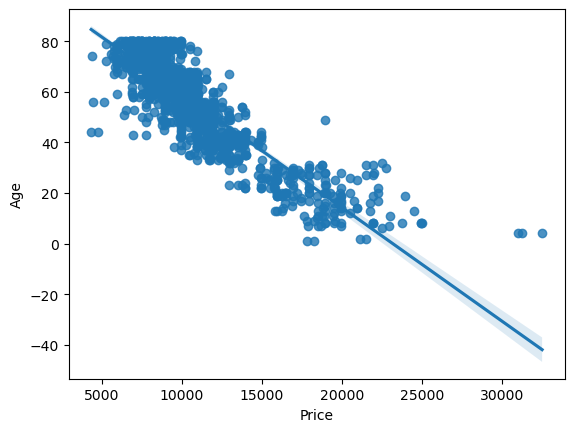

In [185]:
sns.regplot(y = df['Age'], x = df['Price'])

<Axes: xlabel='Price', ylabel='Mfg_Year'>

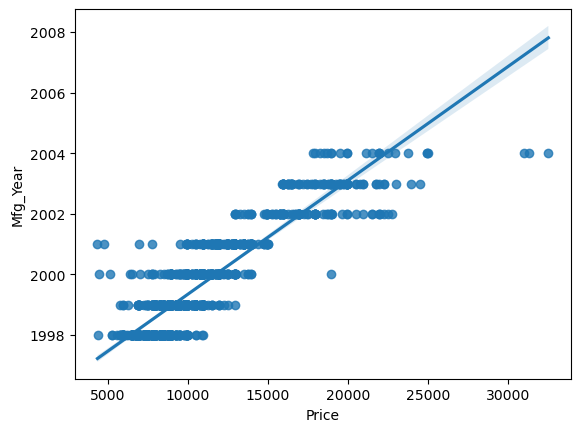

In [186]:
sns.regplot(y = df['Mfg_Year'], x = df['Price'])

<Axes: xlabel='Price', ylabel='KM'>

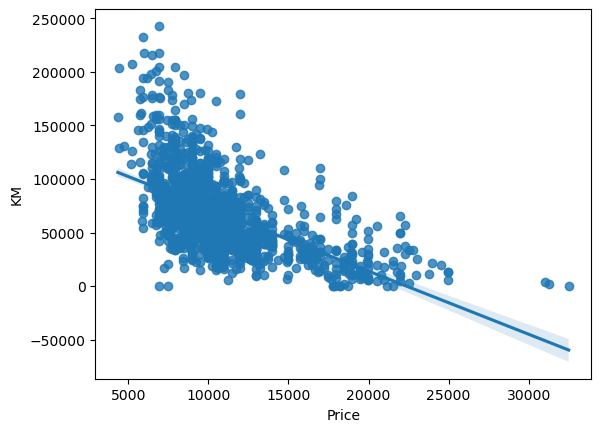

In [187]:
sns.regplot(y = df['KM'], x = df['Price'])

<Axes: xlabel='Price', ylabel='Weight'>

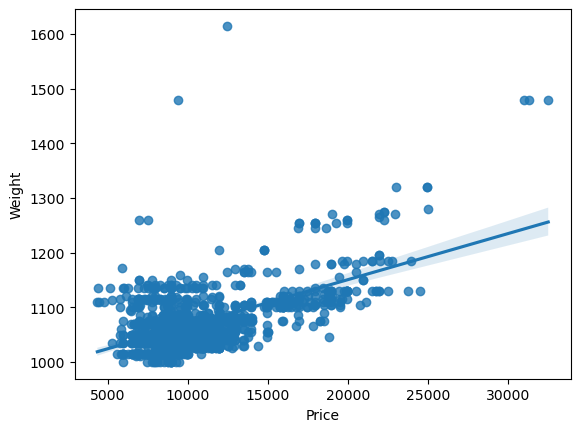

In [188]:
sns.regplot(y = df['Weight'], x = df['Price'])

## Checking for outliers and if present removing them or replacing them with mean or median

SKewness is : -0.82670187309842


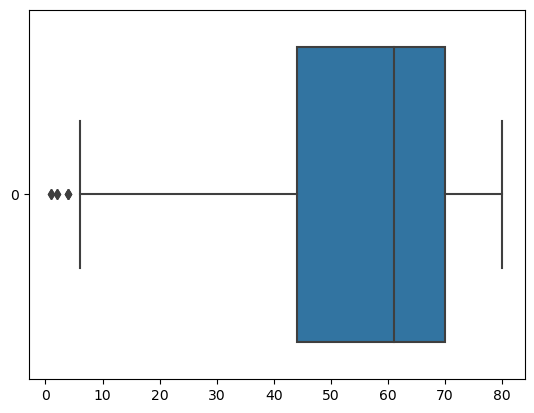

In [217]:
sns.boxplot(df['Age'], orient = 'h')
print("SKewness is :", df['Age'].skew())

SKewness is : 0.9113036268480895


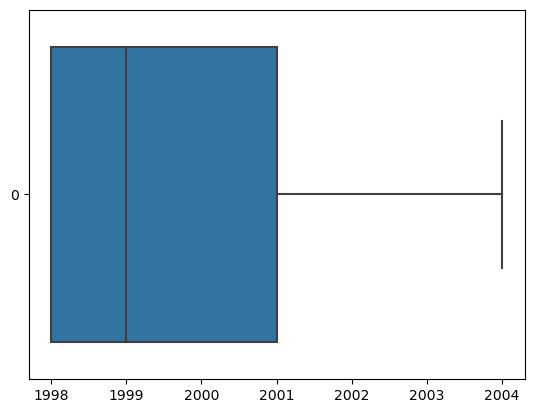

In [218]:
sns.boxplot(df['Mfg_Year'], orient = 'h')
print("SKewness is :", df['Mfg_Year'].skew())

### Prediction of prices in presence of outliers present in these indepedent variables

In [274]:
X = df[['Age', 'Mfg_Year', 'KM', 'Weight', 'HP', 'Automatic_airco', 'Quarterly_Tax', 'Powered_Windows', 
        'Central_Lock', 'Sport_Model']]
Y = df['Price']

In [275]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1442)

In [276]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(1077, 10) (359, 10)
(1077,) (359,)


In [277]:
model = LinearRegression()
fit = model.fit(X_train, Y_train)

In [278]:
pred_train = fit.predict(X_train)
pred_train

array([10979.75560526,  7496.01747469, 20800.33430414, ...,
       10194.71501716,  9098.32981518,  9994.52508828])

In [279]:
print("R2 Score of trained predicted data is: ", round(r2_score(pred_train, Y_train)*100, 2))

R2 Score of trained predicted data is:  89.32


In [280]:
pred = fit.predict(X_test)
pred

array([18089.04535771, 12815.15049144, 20860.94864852,  8579.53256563,
       17894.23237044, 12488.65549847,  9088.26877887,  9951.67395655,
        7961.04441177,  8245.45373561, 10667.27405243,  6893.27504963,
       18351.12389778, 11346.5420867 ,  6295.23073558,  8160.57510238,
        9271.90711292,  7150.51911114, 13935.18668032, 10496.44427987,
        9628.01886061,  7880.45574137,  9628.4392156 ,  9614.37263115,
        7073.4165611 ,  6847.00060571, 16574.09707258,  7838.39736587,
       19752.33214926, 20565.31999196,  8929.98274448,  9729.7705217 ,
        9629.59514148,  8509.28657294, 10390.12268819, 10292.24131587,
        7493.43582607,  6247.78442061,  6669.9789615 ,  7928.39335724,
       10233.90509147,  6427.63605081,  7396.55483708,  9204.67605088,
       10094.80335676,  9614.26098463, 18342.6254188 ,  7238.5684812 ,
       10097.75413633,  6798.50374558,  8524.67569464, 10554.44127677,
        8515.86441512,  7753.71786981,  6811.018321  ,  7213.81089713,
      

In [281]:
print("R2 Score of test prediction data is: ", round(r2_score(pred, Y_test)*100, 2))
print("MAE of trained predicted data is: ", round(mean_absolute_error(pred_train, Y_train)*100, 2))
print("MSE Score of trained predicted data is: ", round(mean_squared_error(pred_train, Y_train)*100, 2))
print("RMSE Score of trained predicted data is: ", round(sqrt(mean_squared_error(pred_train, Y_train))*100, 2))

R2 Score of test prediction data is:  85.21
MAE of trained predicted data is:  84998.82
MSE Score of trained predicted data is:  128933253.52
RMSE Score of trained predicted data is:  113548.78


In [282]:
pred1 = fit.predict([[80,2000, 15000, 1200, 85, 1, 90, 1, 0, 0]])
pred1

C:\Users\Rushikesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15894.54965729])

In [283]:
new_data = pd.DataFrame([{'Age':80, 'Mgf_Year':2000, 'KM':5000, 'Weight':1200, 'HP':85, 'Automatic_airco':1, 
                          'Quarterly_Tax':90, 'Powered_Windows':1, 'Central_Lock':0, 'Sport_Model':0}], index = [1436])
new_data

,Age,Mgf_Year,KM,Weight,HP,Automatic_airco,Quarterly_Tax,Powered_Windows,Central_Lock,Sport_Model
1436,80,2000,5000,1200,85,1,90,1,0,0


In [286]:
pred2 = fit.predict([[80,2000,5000,1200,85,1,90,1,0,0]])
pred2

C:\Users\Rushikesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16079.06894902])

<Axes: xlabel='Price'>

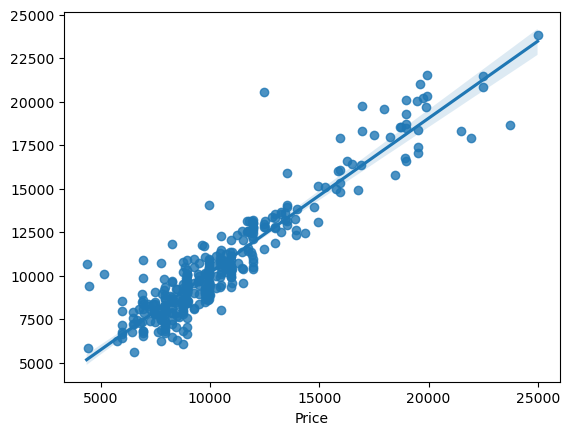

In [289]:
sns.regplot(x = Y_test, y = pred)

## This model can be used for future predictions